# Lab | Customer Analysis Round 5

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # no more warnings
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
numerical = data.select_dtypes(include=np.number)
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [19]:
data_corr = numerical.corr()
data_corr = round(data_corr,2)
data_corr

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
Income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
Monthly Premium Auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
Months Since Last Claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
Months Since Policy Inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
Number of Open Complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
Number of Policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
Total Claim Amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


## 1. X-y split

In [6]:
y = numerical['Total Claim Amount']
X = numerical.drop(['Total Claim Amount'], axis=1)
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


## 2. Normalize (numerical).

In [15]:
transformer = MinMaxScaler().fit(numerical)
x_minmax = transformer.transform(numerical)
print(x_minmax.shape)

(9134, 8)


In [8]:
x_minmax

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.        , 0.        ,
        0.13297388],
       [0.06240565, 0.        , 0.13924051, ..., 0.        , 0.875     ,
        0.39105113],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.        , 0.125     ,
        0.19576416],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.6       , 0.125     ,
        0.27329676],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.        , 0.25      ,
        0.2388757 ],
       [0.00876645, 0.        , 0.06751055, ..., 0.        , 0.        ,
        0.12771622]])

In [10]:
X_num_norm = pd.DataFrame(x_minmax,columns=numerical.columns)
X_num_norm.head() 

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


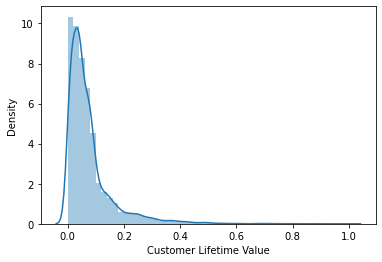

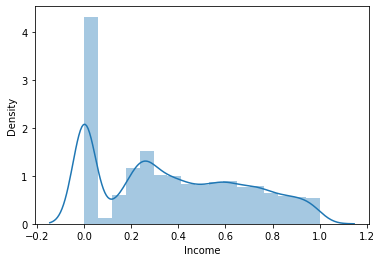

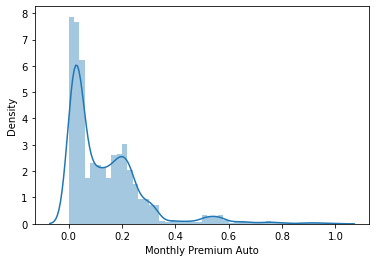

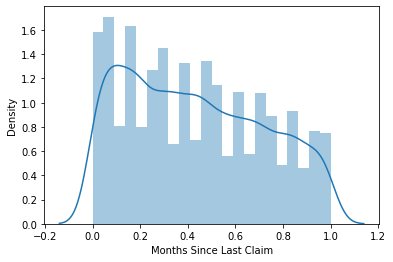

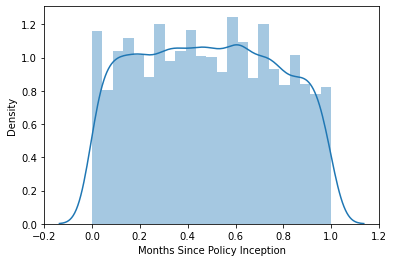

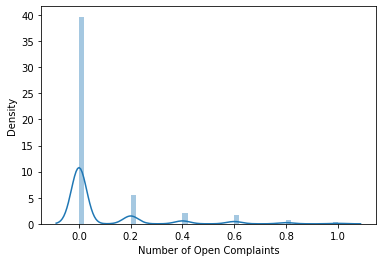

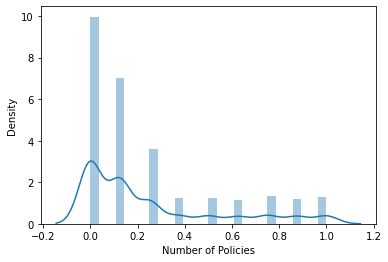

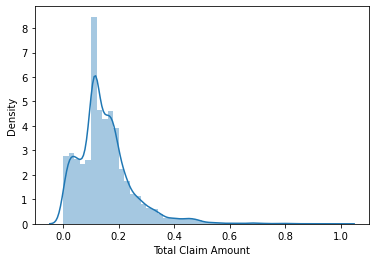

In [11]:
for column in X_num_norm.columns:
    sns.distplot(X_num_norm[column])
    plt.show()